In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
df['Age']  = df['Age'].fillna(df['Age'].mean())

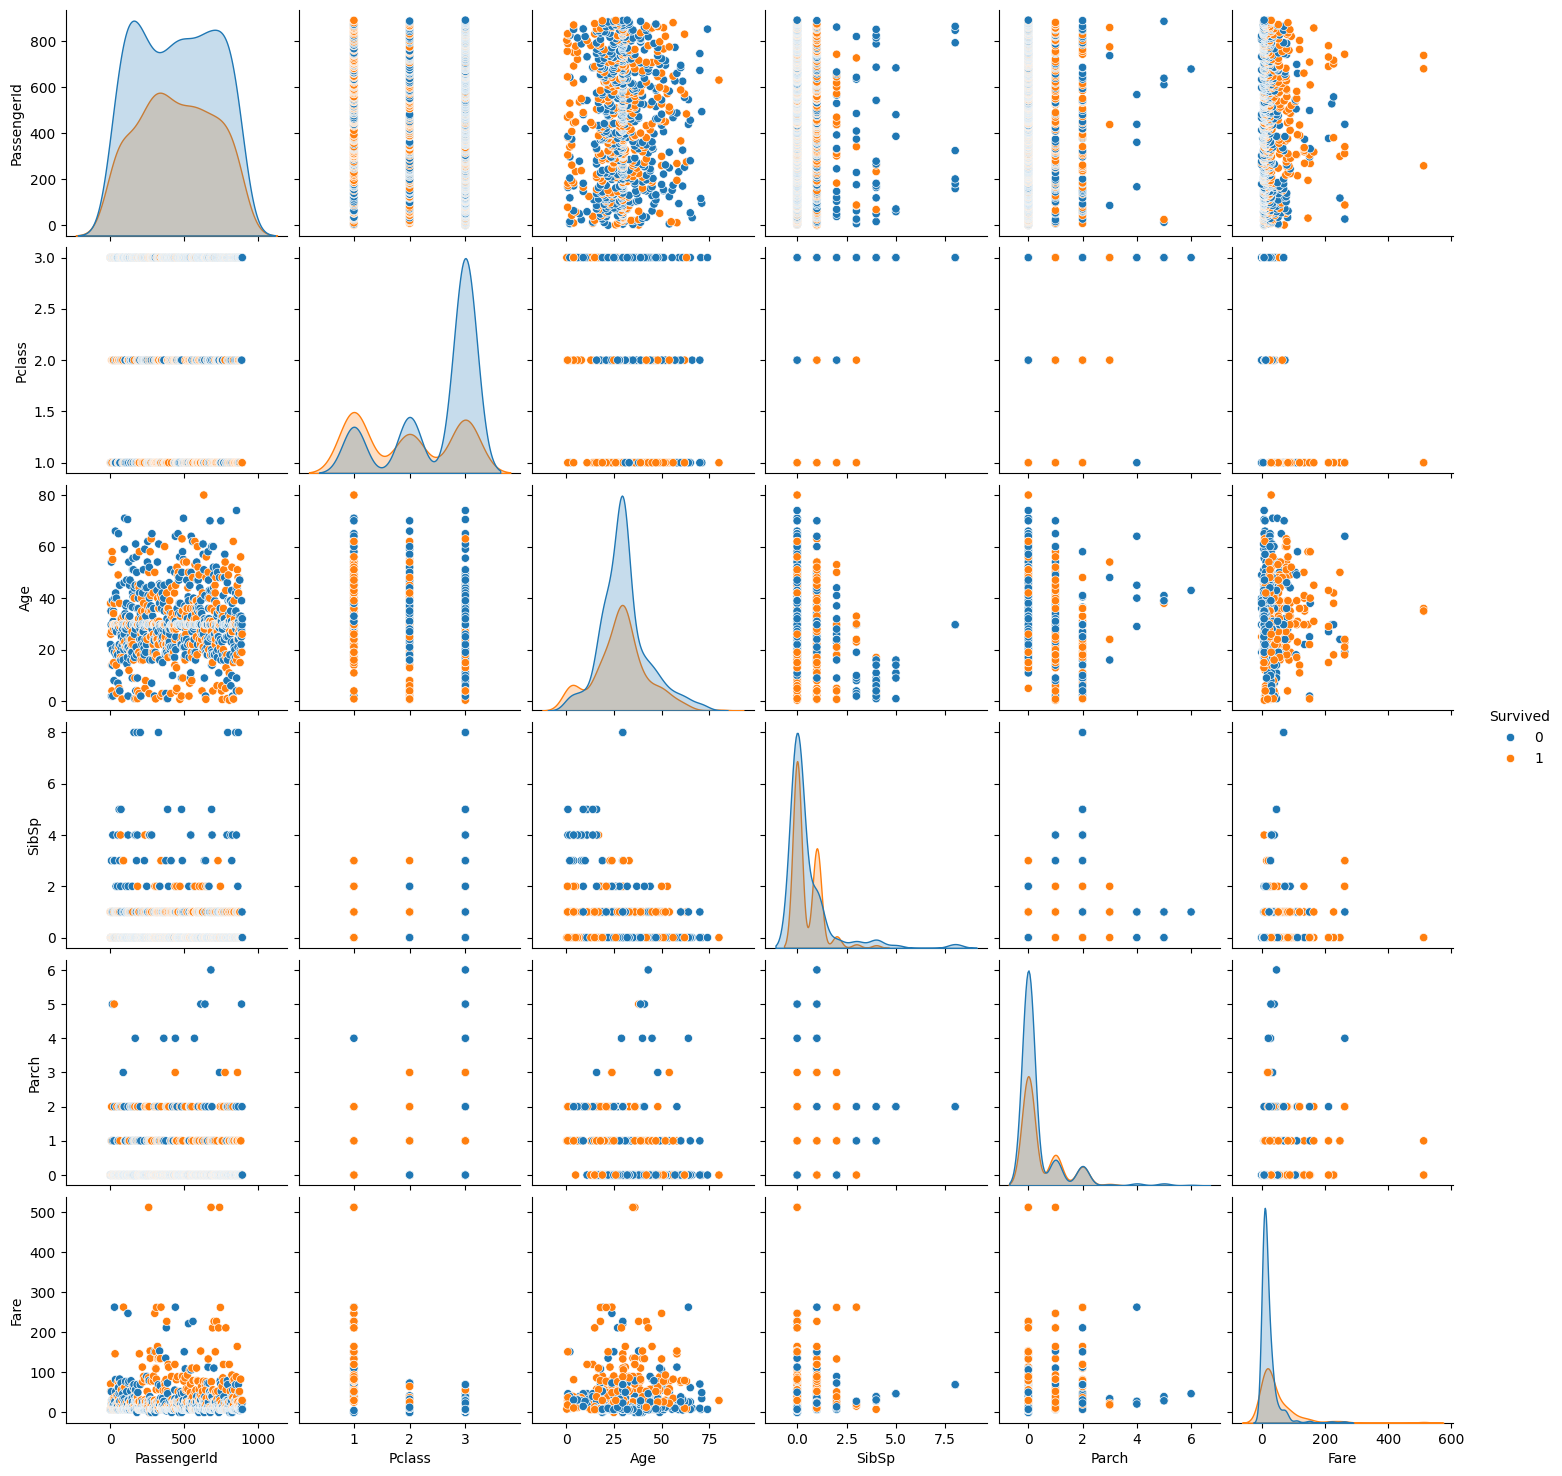

In [47]:
sns.pairplot(df, hue='Survived')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

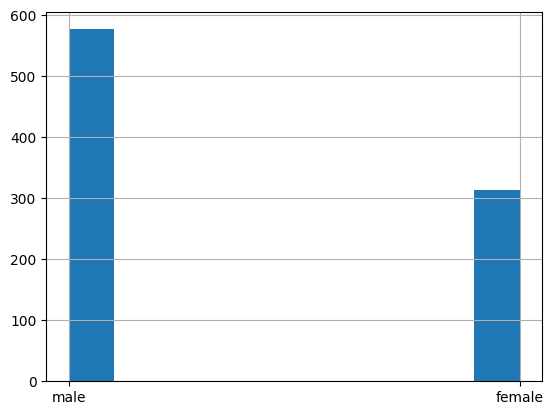

In [49]:
df['Sex'].hist()

In [50]:
sex_mapping = {'male':0, 'female':1}
df['Sex'] = df['Sex'].map(sex_mapping)

<Axes: >

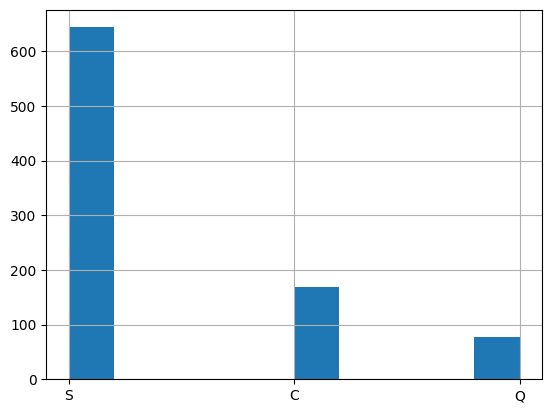

In [51]:
df['Embarked'].hist()

In [52]:
embarked_map = {'S':0, 'C':1, 'Q':3}
df['Embarked'] = df['Embarked'].map(embarked_map)

In [53]:
df['Cabin'] = df['Cabin'].dropna(inplace=True)

In [54]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df['Cabin'] = label.fit_transform(df['Cabin'])

In [55]:
df = df.drop(['Name', 'Ticket'], axis=1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    int32  
 9   Embarked     889 non-null    float64
dtypes: float64(3), int32(1), int64(6)
memory usage: 66.3 KB


In [57]:
df['Embarked'] = df['Embarked'].dropna(inplace=True)

<Axes: >

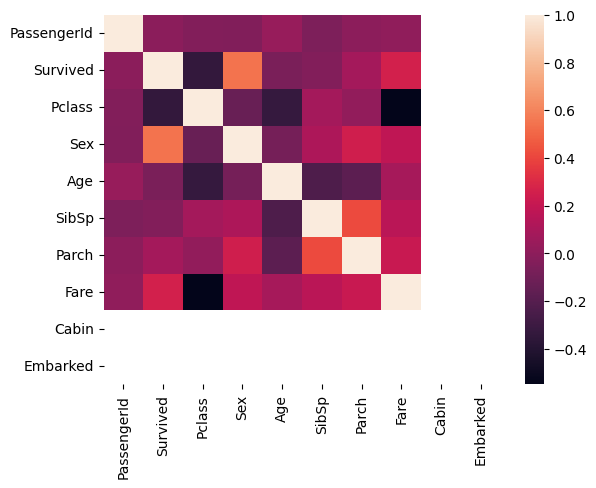

In [58]:
sns.heatmap(df.corr())

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [60]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked       891
dtype: int64

In [63]:
X = df.drop(['Survived', 'Embarked'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {acc}")

Naive Bayes Accuracy: 0.7094972067039106


In [68]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = nb.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf}")

Random Forest Accuracy: 0.7094972067039106


In [69]:
df = DecisionTreeClassifier(random_state=42)
bc = BaggingClassifier(estimator=df, n_estimators=100, random_state=42)
bc.fit(X_train, y_train)
y_pred_bc = nb.predict(X_test)
acc_bc = accuracy_score(y_test, y_pred_bc)
print(f"Bagging Accuracy: {acc_bc}")

Bagging Accuracy: 0.7094972067039106


In [71]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(learning_rate=0.01)
adaboost.fit(X_train, y_train)
y_pred_ad = adaboost.predict(X_test)
acc_Ad = accuracy_score(y_test, y_pred)
print(f"Boosting Accuracy: {acc_Ad}")

Boosting Accuracy: 0.7094972067039106


C:\Users\sselc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
